## install libs

In [1]:
%pip install spacy-lookups-data

Note: you may need to restart the kernel to use updated packages.Collecting spacy-lookups-data
     -------------------------------------- 98.5/98.5 MB 229.6 kB/s eta 0:00:00




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
%pip install xlwt


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ------------------------------------ 100.0/100.0 kB 717.9 kB/s eta 0:00:00


In [3]:
%pip install pandas

In [50]:
%pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [95]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [4]:
%pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)



You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install spacy
%pip install Counter

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install Sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install seaborn

You should consider upgrading via the 'c:\Users\ACER\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## importing libs

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import string
from string import digits
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import cohen_kappa_score as qwk
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.pipeline import Pipeline
from spell import spell_check
from Lemma import lemmatization
from textblob import TextBlob

### data cleaning

In [3]:
data = pd.read_excel('Dataset/Analisis_Essay_Grading_Olahraga.xlsx')
data2 = pd.read_excel('Dataset/Analisis_Essay_Grading_Lifestyle.xlsx')
data3 = pd.read_excel('Dataset/Analisis_Essay_Grading_Teknologi - Copy.xlsx')
data4 = pd.read_excel('Dataset/Analisis_Essay_Grading_Politik.xlsx')

print("Jumlah data 1:", len(data))
print("Jumlah data 2:", len(data2))
print("Jumlah data 3:", len(data3))
print("Jumlah data 4:", len(data4))
display(data.head())
display(data2.head())
display(data3.head())
display(data4.head())


Jumlah data 1: 544
Jumlah data 2: 568
Jumlah data 3: 515
Jumlah data 4: 535


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_1,- Menyehatkan tubuh - Memperkuat otot-otot - M...,46.666667,40,50,50
1,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_2,1. Meringankan Kerja Jantung. 2. Melancarkan A...,20.000000,15,20,25
2,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_3,"refresing, kesehatan otot, syaraf-syaraf mejad...",22.666667,28,15,25
3,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_4,1. Menjaga kondisi fisik tetap prima. 2. Mengh...,28.333333,35,25,25
4,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_6,sehat,6.333333,9,0,10


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,Fungsi karbohidrat adalah sebagai pemasok ener...,siswa_2,"sumber tenaga, pemanis alami, menjaga sistem i...",26.666667,20,35,25
1,1,Fungsi karbohidrat adalah sebagai pemasok ener...,siswa_3,"sebagai sumber energi, pemanis alami, menjaga ...",21.000000,18,20,25
2,1,Fungsi karbohidrat adalah sebagai pemasok ener...,siswa_4,1. Sebagai energi. 2. Sebagai memperlancaar pe...,41.666667,25,50,50
3,1,Fungsi karbohidrat adalah sebagai pemasok ener...,siswa_6,"untuk membuat kenyang, agar tidak lapar, agar ...",18.333333,15,15,25
4,1,Fungsi karbohidrat adalah sebagai pemasok ener...,siswa_7,Karbohidrat mempunyai peran penting untuk pros...,81.666667,70,90,85


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,Komputer adalah rangkaian mesin elektronik yan...,siswa_1,Komputer adalah serangkaian ataupun sekelompok...,76.666667,60,95,75
1,1,Komputer adalah rangkaian mesin elektronik yan...,siswa_2,komputer adalah mesin penghitung,11.666667,10,15,10
2,1,Komputer adalah rangkaian mesin elektronik yan...,siswa_3,mesin yang membantu manusia untuk menjalankan ...,25.000000,30,20,25
3,1,Komputer adalah rangkaian mesin elektronik yan...,siswa_4,Komputer adalah alat komputasi yang diciptakan...,10.666667,12,10,10
4,1,Komputer adalah rangkaian mesin elektronik yan...,siswa_6,alat untuk memudahkan masnusia,11.333333,14,10,10


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,Partai politik sebagai organisasi resmi untuk ...,siswa_1,1. Untuk memperkenalkan nilai-nilai politik 2....,45.000000,35,50,50
1,1,Partai politik sebagai organisasi resmi untuk ...,siswa_2,1. sebagai sarana komunikasi politik 2. sebaga...,55.000000,45,70,50
2,1,Partai politik sebagai organisasi resmi untuk ...,siswa_3,"sebagai penyalur aspirasi rakyat, sebagai temp...",25.666667,22,30,25
3,1,Partai politik sebagai organisasi resmi untuk ...,siswa_4,Untuk mengaspirasikan suara rakyat indonesia.,21.000000,18,20,25
4,1,Partai politik sebagai organisasi resmi untuk ...,siswa_6,1.Cara untuk memperkenalkan nilai-nilai politi...,30.333333,30,36,25


In [4]:
data = data.append(data2, ignore_index=True)
data = data.append(data3, ignore_index=True)
data = data.append(data4, ignore_index=True)
print("Total data:",len(data))
data.head()

Total data: 2162


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_1,- Menyehatkan tubuh - Memperkuat otot-otot - M...,46.666667,40,50,50
1,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_2,1. Meringankan Kerja Jantung. 2. Melancarkan A...,20.000000,15,20,25
2,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_3,"refresing, kesehatan otot, syaraf-syaraf mejad...",22.666667,28,15,25
3,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_4,1. Menjaga kondisi fisik tetap prima. 2. Mengh...,28.333333,35,25,25
4,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_6,sehat,6.333333,9,0,10


#### duplicate data

In [5]:
copydata = data.copy()
data_lemma = data.copy()
data_lemma2 = data.copy
data_stem = data.copy()

### Modelling

#### Pre-processing

In [6]:
import spacy
#--------------------------------case folding---------------------------------
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['Kunci Jawaban']=data['Kunci Jawaban'].map(lambda m:re.sub(pattern," ",m))
  copydata['Jawaban']=data['Jawaban'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].map(lambda m:m.lower())
  copydata['Jawaban']=copydata['Jawaban'].map(lambda m:m.lower())
  return copydata
# ------------------------------------------------------------------------------

# ----------------------------Tokenization--------------------------------------
def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['Kunci Jawaban']= copydata['Kunci Jawaban'].apply(lambda x: tokenization(x))
  copydata['Jawaban']= copydata['Jawaban'].apply(lambda x: tokenization(x))
  return copydata

def spellcheck(copydata):
  copydata['Kunci Jawaban'] = copydata['Kunci Jawaban'].apply(lambda x: spell_check(x))
  copydata['Jawaban'] = copydata['Jawaban'].apply(lambda x: spell_check(x))
  return copydata
# ------------------------------------------------------------------------------

# --------------------------------------Filtering-------------------------------
sw= nltk.corpus.stopwords.words('indonesian')
new_stopwords = ['versi','android', 'api', 'level']
sw.extend(new_stopwords)

def remove_SW(copydata):
   copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if not item in sw])
   copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if not item in sw])
   return copydata

def remove_digits(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if item.isalpha()])
  copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if item.isalpha()])
  return copydata

# ------------------------------------------------------------------------------

# -------------------------------Stemming---------------------------------------
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(data_stem):
  data_stem['Kunci Jawaban']=data_stem['Kunci Jawaban'].apply(lambda x: [stemmer.stem(item) for item in x])
  data_stem['Jawaban']=data_stem['Jawaban'].apply(lambda x: [stemmer.stem(item) for item in x])
  return data_stem

def lemma(data_lemma):
  data_lemma['Kunci Jawaban']=data_lemma['Kunci Jawaban'].apply(lambda x: lemmatization(x))
  data_lemma['Jawaban']=data_lemma['Jawaban'].apply(lambda x: lemmatization(x))
  return data_lemma

def remove_empty_tokens(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if item !=''])
  copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['Kunci Jawaban']=copydata['Kunci Jawaban'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Jawaban']=copydata['Jawaban'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['Kunci Jawaban']= copydata['Kunci Jawaban'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Jawaban']= copydata['Jawaban'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
  
def remove_space(copydata):
  copydata['Kunci Jawaban']= copydata['Kunci Jawaban'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Jawaban']= copydata['Jawaban'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

##### Case folding

In [7]:
case_fold = copydata.pipe(remove_punc).pipe(lower)
writer = pd.ExcelWriter('Result - Data Complete.xlsx')
case_fold.to_excel(writer, 'Case Folding')
writer.save()

print("Case folding results")
copydata.head()


Case folding results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,mengurangi stress membentuk otot tubuh dan ...,siswa_1,menyehatkan tubuh memperkuat otot otot m...,46.666667,40,50,50
1,1,mengurangi stress membentuk otot tubuh dan ...,siswa_2,1 meringankan kerja jantung 2 melancarkan a...,20.000000,15,20,25
2,1,mengurangi stress membentuk otot tubuh dan ...,siswa_3,refresing kesehatan otot syaraf syaraf mejad...,22.666667,28,15,25
3,1,mengurangi stress membentuk otot tubuh dan ...,siswa_4,1 menjaga kondisi fisik tetap prima 2 mengh...,28.333333,35,25,25
4,1,mengurangi stress membentuk otot tubuh dan ...,siswa_6,sehat,6.333333,9,0,10


##### Converting slang word

In [8]:
slangs = copydata.pipe(spellcheck)

slangs.to_excel(writer, 'Converting Slang')
writer.save()

print('Converting slang word results')
slangs.head()

Converting slang word results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,mengurangi stress membentuk otot tubuh dan men...,siswa_1,menyehatkan tubuh memperkuat otot otot menjern...,46.666667,40,50,50
1,1,mengurangi stress membentuk otot tubuh dan men...,siswa_2,1 meringankan kerja jantung 2 melancarkan alir...,20.000000,15,20,25
2,1,mengurangi stress membentuk otot tubuh dan men...,siswa_3,refresing kesehatan otot syaraf syaraf mejadi ...,22.666667,28,15,25
3,1,mengurangi stress membentuk otot tubuh dan men...,siswa_4,1 menjaga kondisi fisik tetap prima 2 menghila...,28.333333,35,25,25
4,1,mengurangi stress membentuk otot tubuh dan men...,siswa_6,sehat,6.333333,9,0,10


##### Tokenization

In [9]:
token_result = copydata.pipe(token)

token_result.to_excel(writer, 'Tokenization')
writer.save()

print('Tokenization results')
token_result.head()

Tokenization results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[mengurangi, stress, membentuk, otot, tubuh, d...",siswa_1,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",46.666667,40,50,50
1,1,"[mengurangi, stress, membentuk, otot, tubuh, d...",siswa_2,"[1, meringankan, kerja, jantung, 2, melancarka...",20.000000,15,20,25
2,1,"[mengurangi, stress, membentuk, otot, tubuh, d...",siswa_3,"[refresing, kesehatan, otot, syaraf, syaraf, m...",22.666667,28,15,25
3,1,"[mengurangi, stress, membentuk, otot, tubuh, d...",siswa_4,"[1, menjaga, kondisi, fisik, tetap, prima, 2, ...",28.333333,35,25,25
4,1,"[mengurangi, stress, membentuk, otot, tubuh, d...",siswa_6,[sehat],6.333333,9,0,10


##### Filtering (Removing stopwors)

In [10]:
filtering = copydata.pipe(remove_SW).pipe(remove_digits)

filtering.to_excel(writer, 'Filtering')
writer.save()

print("Filtering Results")
filtering.head()

Filtering Results


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_1,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",46.666667,40,50,50
1,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_2,"[meringankan, kerja, jantung, melancarkan, ali...",20.000000,15,20,25
2,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_3,"[refresing, kesehatan, otot, syaraf, syaraf, m...",22.666667,28,15,25
3,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_4,"[menjaga, kondisi, fisik, prima, menghilangkan...",28.333333,35,25,25
4,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_6,[sehat],6.333333,9,0,10


In [11]:
print('Data asli: ', data['Jawaban'][543])
print('Hasil Filtering: ', filtering['Jawaban'][543])

Data asli:  parkour adalah sejenis olah raga, dimana hal ini membutuhkan badan yang kuat. 
Hasil Filtering:  ['parkour', 'sejenis', 'olah', 'raga', 'dimana', 'membutuhkan', 'badan', 'kuat']


##### Stemming

In [12]:
import time
start_stemming = time.time()
data_stem = data_stem.pipe(remove_punc).pipe(lower).pipe(spellcheck).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(stemming).pipe(remove_empty_tokens).pipe(remove_single_letters)
end_stemming = time.time()
stem_time = round((end_stemming-start_stemming), 2)

data_stem.to_excel(writer, 'Stemming')
writer.save()

print("Stemming process time = ", stem_time)


Stemming process time =  236.46


In [13]:
data_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_1,"[sehat, tubuh, kuat, otot, otot, jernih, pikir...",46.666667,40,50,50
1,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_2,"[ringan, kerja, jantung, lancar, alir, darah, ...",20.000000,15,20,25
2,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_3,"[refresing, sehat, otot, syaraf, syaraf, mejad...",22.666667,28,15,25
3,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_4,"[jaga, kondisi, fisik, prima, hilang, stress, ...",28.333333,35,25,25
4,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_6,[sehat],6.333333,9,0,10


In [14]:
display(data[['Jawaban','Kunci Jawaban']].head(), data_stem[['Jawaban','Kunci Jawaban']].head())

,Jawaban,Kunci Jawaban
0,- Menyehatkan tubuh - Memperkuat otot-otot - M...,-Mengurangi stress - Membentuk otot tubuh dan ...
1,1. Meringankan Kerja Jantung. 2. Melancarkan A...,-Mengurangi stress - Membentuk otot tubuh dan ...
2,"refresing, kesehatan otot, syaraf-syaraf mejad...",-Mengurangi stress - Membentuk otot tubuh dan ...
3,1. Menjaga kondisi fisik tetap prima. 2. Mengh...,-Mengurangi stress - Membentuk otot tubuh dan ...
4,sehat,-Mengurangi stress - Membentuk otot tubuh dan ...


,Jawaban,Kunci Jawaban
0,"[sehat, tubuh, kuat, otot, otot, jernih, pikir...","[kurang, stress, bentuk, otot, tubuh, encang, ..."
1,"[ringan, kerja, jantung, lancar, alir, darah, ...","[kurang, stress, bentuk, otot, tubuh, encang, ..."
2,"[refresing, sehat, otot, syaraf, syaraf, mejad...","[kurang, stress, bentuk, otot, tubuh, encang, ..."
3,"[jaga, kondisi, fisik, prima, hilang, stress, ...","[kurang, stress, bentuk, otot, tubuh, encang, ..."
4,[sehat],"[kurang, stress, bentuk, otot, tubuh, encang, ..."


##### Lemmatization

In [15]:
start_lemma = time.time()
data_lemma = data_lemma.pipe(remove_punc).pipe(lower).pipe(spellcheck).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(lemma).pipe(remove_empty_tokens).pipe(remove_single_letters)
end_lemma = time.time()
lemma_time = round((end_lemma-start_lemma), 2)

data_lemma.to_excel(writer, 'Lemmatization')
writer.save()
print("Lemmatization process time = ", lemma_time)

Lemmatization process time =  278.6


In [16]:
data_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_1,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",46.666667,40,50,50
1,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_2,"[meringankan, kerja, jantung, melancarkan, ali...",20.000000,15,20,25
2,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_3,"[refresing, kesehatan, otot, syaraf, syaraf, m...",22.666667,28,15,25
3,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_4,"[menjaga, kondisi, fisik, prima, menghilangkan...",28.333333,35,25,25
4,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_6,[sehat],6.333333,9,0,10


In [17]:
display(data[['Jawaban','Kunci Jawaban']].head(), data_lemma[['Jawaban','Kunci Jawaban']].head())

,Jawaban,Kunci Jawaban
0,- Menyehatkan tubuh - Memperkuat otot-otot - M...,-Mengurangi stress - Membentuk otot tubuh dan ...
1,1. Meringankan Kerja Jantung. 2. Melancarkan A...,-Mengurangi stress - Membentuk otot tubuh dan ...
2,"refresing, kesehatan otot, syaraf-syaraf mejad...",-Mengurangi stress - Membentuk otot tubuh dan ...
3,1. Menjaga kondisi fisik tetap prima. 2. Mengh...,-Mengurangi stress - Membentuk otot tubuh dan ...
4,sehat,-Mengurangi stress - Membentuk otot tubuh dan ...


,Jawaban,Kunci Jawaban
0,"[menyehatkan, tubuh, memperkuat, otot, otot, m...","[mengurangi, stress, membentuk, otot, tubuh, m..."
1,"[meringankan, kerja, jantung, melancarkan, ali...","[mengurangi, stress, membentuk, otot, tubuh, m..."
2,"[refresing, kesehatan, otot, syaraf, syaraf, m...","[mengurangi, stress, membentuk, otot, tubuh, m..."
3,"[menjaga, kondisi, fisik, prima, menghilangkan...","[mengurangi, stress, membentuk, otot, tubuh, m..."
4,[sehat],"[mengurangi, stress, membentuk, otot, tubuh, m..."


In [18]:
print('Without pre-processing')
display(data)
print('With Stemming')
display(data_stem)
print('With Lemmatization')
display(data_lemma)

Without pre-processing


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_1,- Menyehatkan tubuh - Memperkuat otot-otot - M...,46.666667,40,50,50
1,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_2,1. Meringankan Kerja Jantung. 2. Melancarkan A...,20.000000,15,20,25
2,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_3,"refresing, kesehatan otot, syaraf-syaraf mejad...",22.666667,28,15,25
3,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_4,1. Menjaga kondisi fisik tetap prima. 2. Mengh...,28.333333,35,25,25
4,1,-Mengurangi stress - Membentuk otot tubuh dan ...,siswa_6,sehat,6.333333,9,0,10
...,...,...,...,...,...,...,...,...
2157,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_59,"Indonesia, Singapura, Malaysia, Thailand, Fili...",90.000000,90,90,90
2158,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_60,"Indonesia, Myanmar, Filiphina, Thailand, Malay...",83.333333,70,90,90
2159,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_61,"Indonesia, Malaysia, Singapura, Laos, Kamboja,...",90.000000,80,100,90
2160,10,"Indonesia, Thailand, Malaysia, Singapura, Fili...",siswa_63,-Indonesia -Malaysia -Myanmar -Filipina -Thail...,71.666667,70,70,75


With Stemming


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_1,"[sehat, tubuh, kuat, otot, otot, jernih, pikir...",46.666667,40,50,50
1,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_2,"[ringan, kerja, jantung, lancar, alir, darah, ...",20.000000,15,20,25
2,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_3,"[refresing, sehat, otot, syaraf, syaraf, mejad...",22.666667,28,15,25
3,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_4,"[jaga, kondisi, fisik, prima, hilang, stress, ...",28.333333,35,25,25
4,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_6,[sehat],6.333333,9,0,10
...,...,...,...,...,...,...,...,...
2157,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_59,"[indonesia, singapura, malaysia, thailand, fil...",90.000000,90,90,90
2158,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_60,"[indonesia, myanmar, filiphina, thailand, mala...",83.333333,70,90,90
2159,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_61,"[indonesia, malaysia, singapura, laos, kamboja...",90.000000,80,100,90
2160,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_63,"[indonesia, malaysia, myanmar, filipina, thail...",71.666667,70,70,75


With Lemmatization


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3
0,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_1,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",46.666667,40,50,50
1,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_2,"[meringankan, kerja, jantung, melancarkan, ali...",20.000000,15,20,25
2,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_3,"[refresing, kesehatan, otot, syaraf, syaraf, m...",22.666667,28,15,25
3,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_4,"[menjaga, kondisi, fisik, prima, menghilangkan...",28.333333,35,25,25
4,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_6,[sehat],6.333333,9,0,10
...,...,...,...,...,...,...,...,...
2157,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_59,"[Indonesia, singapura, Malaysia, Thailand, Fil...",90.000000,90,90,90
2158,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_60,"[Indonesia, myanmar, filiphina, Thailand, Mala...",83.333333,70,90,90
2159,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_61,"[Indonesia, Malaysia, singapura, laos, Kamboja...",90.000000,80,100,90
2160,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_63,"[Indonesia, Malaysia, myanmar, Filipina, Thail...",71.666667,70,70,75


#### TF-IDF + Cosine Similarity

In [19]:
import math
from numpy.linalg import norm

def term(query, answer):
    #--------------------term-----------------
    BoWQ = set(query)
    BoWA = set(answer)
    uniqueWords = BoWQ.union(BoWA)

    #-----term frequency of word in doc-------
    numOfWordsQ = dict.fromkeys(uniqueWords, 0)
    for word in query:
        numOfWordsQ[word] += 1

    numOfWordsA = dict.fromkeys(uniqueWords, 0)
    for word in answer:
        numOfWordsA[word] += 1
    
    # print(numOfWordsA)
    term = pd.DataFrame([numOfWordsQ, numOfWordsA])
    term = term.transpose()

    #--------------term frequency (TF)---------------
    tfQ = {}
    tfA = {}

    bagOfWordsCount = len(query)
    #tf Kunci Jawaban
    for word, count in numOfWordsQ.items():
        tfQ[word] = count / float(bagOfWordsCount)

    #tf Jawaban
    for word, count in numOfWordsA.items():
        if len(answer) == 0:
            tfA[word] = 0
        else:
            tfA[word] = count / float(len(answer))
    # tf = pd.DataFrame([tfQ],[tfA])
    # tf = tf.transpose()

    dfQ = dict.fromkeys(uniqueWords, 0)
    for word in BoWQ:
        dfQ[word] += 1

    dfA= dict.fromkeys(uniqueWords, 0)
    for word in BoWA:
        dfA[word] += 1
    
    DF = []
    for i in range(len(uniqueWords)):
        DF.append(list(dfQ.values())[i]+list(dfA.values())[i])
    term['DF'] = DF

    #-------------------IDF---------------------------
    N = len([numOfWordsQ, numOfWordsA])
    
    # idfDict = dict.fromkeys([numOfWordsQ, numOfWordsA][0].keys(), 0)
    # for document in [numOfWordsQ, numOfWordsA]:
    #     for word, val in document.items():
    #         if val > 0:
    #             idfDict[word] += 1
    
    # for word, val in idfDict.items():
    #     idfDict[word] = math.log(N+1 / float(val+1))

    idf = []
    for i in range(len(DF)):
        idf.append(math.log10((N+1) / (DF[i]+1))+1)
        # print(val)

    term['IDF'] = idf

    #-------------------TF-IDF---------------------
    tfidfQ = []
    tfidfA = []
    
    for i in range(len(uniqueWords)):
        tfidfQ.append(list(tfQ.values())[i]*idf[i])
        tfidfA.append(list(tfA.values())[i]*idf[i])
    
    # tfidfQ = list(tfidfQ)
    # tfidfA = list(tfidfA)
    term['TF_IDF Q'] = tfidfQ
    term['TF_IDF A'] = tfidfA

    cosine =np.dot(tfidfQ,tfidfA)/(np.linalg.norm(tfidfQ)*np.linalg.norm(tfidfA))
    # print(len(tfidfA))
    
    return cosine


##### Stemming

In [20]:
start_cos_st = time.time()
cosine_stem = []

for i in range(len(data_stem['Jawaban'])):
    cosine_stem.append(term(data_stem['Kunci Jawaban'][i],data_stem['Jawaban'][i]))
end_cos_st = time.time()

time_cos_st = round((end_cos_st-start_cos_st), 2)
print("TF-IDF processing time with stemming: ",time_cos_st)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1780\3319733346.py:86: RuntimeWarning: invalid value encountered in double_scalars
  cosine =np.dot(tfidfQ,tfidfA)/(np.linalg.norm(tfidfQ)*np.linalg.norm(tfidfA))


TF-IDF processing time with stemming:  5.88


In [21]:
data_stem['Cosine Similarity'] = cosine_stem
data_stem.isnull().sum(axis = 0)

No Soal               0
Kunci Jawaban         0
Siswa                 0
Jawaban               0
Rata Manual           0
Manual 1              0
Manual 2              0
Manual 3              0
Cosine Similarity    10
dtype: int64

In [22]:
data_stem['Cosine Similarity'] = data_stem['Cosine Similarity'].fillna(0)

In [23]:
data_stem.isnull().sum()

No Soal              0
Kunci Jawaban        0
Siswa                0
Jawaban              0
Rata Manual          0
Manual 1             0
Manual 2             0
Manual 3             0
Cosine Similarity    0
dtype: int64

In [24]:
data_stem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No Soal            2162 non-null   int64  
 1   Kunci Jawaban      2162 non-null   object 
 2   Siswa              2162 non-null   object 
 3   Jawaban            2162 non-null   object 
 4   Rata Manual        2162 non-null   float64
 5   Manual 1           2162 non-null   int64  
 6   Manual 2           2162 non-null   int64  
 7   Manual 3           2162 non-null   int64  
 8   Cosine Similarity  2162 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 152.1+ KB


In [25]:
data_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity
0,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_1,"[sehat, tubuh, kuat, otot, otot, jernih, pikir...",46.666667,40,50,50,0.592594
1,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_2,"[ringan, kerja, jantung, lancar, alir, darah, ...",20.000000,15,20,25,0.074469
2,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_3,"[refresing, sehat, otot, syaraf, syaraf, mejad...",22.666667,28,15,25,0.168610
3,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_4,"[jaga, kondisi, fisik, prima, hilang, stress, ...",28.333333,35,25,25,0.261675
4,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_6,[sehat],6.333333,9,0,10,0.174572


##### Lemmatization

In [26]:
start_cos_lm = time.time()
cosine_lemma = []

for i in range(len(data_lemma['Jawaban'])):
    cosine_lemma.append(term(data_lemma['Kunci Jawaban'][i],data_lemma['Jawaban'][i]))
    
end_cos_lm = time.time()
time_cos_lm = round((end_cos_lm - start_cos_lm), 2)
print("TF-IDF processing time with lemma: ",time_cos_lm)

C:\Users\ACER\AppData\Local\Temp\ipykernel_1780\3319733346.py:86: RuntimeWarning: invalid value encountered in double_scalars
  cosine =np.dot(tfidfQ,tfidfA)/(np.linalg.norm(tfidfQ)*np.linalg.norm(tfidfA))


TF-IDF processing time with lemma:  5.54


In [27]:
data_lemma['Cosine Similarity'] = cosine_lemma
data_lemma.isnull().sum()

No Soal               0
Kunci Jawaban         0
Siswa                 0
Jawaban               0
Rata Manual           0
Manual 1              0
Manual 2              0
Manual 3              0
Cosine Similarity    10
dtype: int64

In [28]:
data_lemma['Cosine Similarity'] = data_lemma['Cosine Similarity'].fillna(0)
data_lemma.isnull().sum()

No Soal              0
Kunci Jawaban        0
Siswa                0
Jawaban              0
Rata Manual          0
Manual 1             0
Manual 2             0
Manual 3             0
Cosine Similarity    0
dtype: int64

In [29]:
data_lemma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No Soal            2162 non-null   int64  
 1   Kunci Jawaban      2162 non-null   object 
 2   Siswa              2162 non-null   object 
 3   Jawaban            2162 non-null   object 
 4   Rata Manual        2162 non-null   float64
 5   Manual 1           2162 non-null   int64  
 6   Manual 2           2162 non-null   int64  
 7   Manual 3           2162 non-null   int64  
 8   Cosine Similarity  2162 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 152.1+ KB


In [30]:
data_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity
0,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_1,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",46.666667,40,50,50,0.453271
1,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_2,"[meringankan, kerja, jantung, melancarkan, ali...",20.000000,15,20,25,0.077822
2,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_3,"[refresing, kesehatan, otot, syaraf, syaraf, m...",22.666667,28,15,25,0.085396
3,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_4,"[menjaga, kondisi, fisik, prima, menghilangkan...",28.333333,35,25,25,0.274583
4,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_6,[sehat],6.333333,9,0,10,0.182431


##### No pre-processing

In [31]:
tf_data = data.copy()
token_data = tf_data.pipe(token)

start_cos_ori = time.time()
cosine_ori = []

for i in range(len(tf_data['Jawaban'])):
    cosine_ori.append(term(tf_data['Kunci Jawaban'][i],tf_data['Jawaban'][i]))
    
end_cos_ori = time.time()
time_cos_ori = round((end_cos_ori - start_cos_ori), 2)
print("TF-IDF processing time no pre-processing: ",time_cos_ori)

TF-IDF processing time no pre-processing:  7.34


In [32]:
tf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No Soal        2162 non-null   int64  
 1   Kunci Jawaban  2162 non-null   object 
 2   Siswa          2162 non-null   object 
 3   Jawaban        2162 non-null   object 
 4   Rata Manual    2162 non-null   float64
 5   Manual 1       2162 non-null   int64  
 6   Manual 2       2162 non-null   int64  
 7   Manual 3       2162 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 135.2+ KB


In [33]:
tf_data['Cosine Similarity'] = cosine_ori
tf_data.isnull().sum()
tf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No Soal            2162 non-null   int64  
 1   Kunci Jawaban      2162 non-null   object 
 2   Siswa              2162 non-null   object 
 3   Jawaban            2162 non-null   object 
 4   Rata Manual        2162 non-null   float64
 5   Manual 1           2162 non-null   int64  
 6   Manual 2           2162 non-null   int64  
 7   Manual 3           2162 non-null   int64  
 8   Cosine Similarity  2162 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 152.1+ KB


In [34]:
tf_data.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity
0,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_1,"[-, Menyehatkan, tubuh, -, Memperkuat, otot-ot...",46.666667,40,50,50,0.670715
1,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_2,"[1., Meringankan, Kerja, Jantung., 2., Melanca...",20.000000,15,20,25,0.037352
2,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_3,"[refresing,, kesehatan, otot,, syaraf-syaraf, ...",22.666667,28,15,25,0.000000
3,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_4,"[1., Menjaga, kondisi, fisik, tetap, prima., 2...",28.333333,35,25,25,0.061107
4,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_6,"[sehat, ]",6.333333,9,0,10,0.069545


#### Normalization

In [35]:
def normalization(dataset):
    sys_score = dataset['Cosine Similarity']
    norm = []
    for i in sys_score:
        score = round((i*100),2)
        norm.append(score)
        
    dataset['Model Score'] = norm
    return dataset

In [36]:
normalization(data_stem)
normalization(data_lemma)
normalization(tf_data)
display("Score with stemming",data_stem.head())
display("Score with lemma",data_lemma.head())
display("Score without pre-processing",tf_data.head())

'Score with stemming'

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score
0,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_1,"[sehat, tubuh, kuat, otot, otot, jernih, pikir...",46.666667,40,50,50,0.592594,59.26
1,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_2,"[ringan, kerja, jantung, lancar, alir, darah, ...",20.000000,15,20,25,0.074469,7.45
2,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_3,"[refresing, sehat, otot, syaraf, syaraf, mejad...",22.666667,28,15,25,0.168610,16.86
3,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_4,"[jaga, kondisi, fisik, prima, hilang, stress, ...",28.333333,35,25,25,0.261675,26.17
4,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_6,[sehat],6.333333,9,0,10,0.174572,17.46


'Score with lemma'

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score
0,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_1,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",46.666667,40,50,50,0.453271,45.33
1,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_2,"[meringankan, kerja, jantung, melancarkan, ali...",20.000000,15,20,25,0.077822,7.78
2,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_3,"[refresing, kesehatan, otot, syaraf, syaraf, m...",22.666667,28,15,25,0.085396,8.54
3,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_4,"[menjaga, kondisi, fisik, prima, menghilangkan...",28.333333,35,25,25,0.274583,27.46
4,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_6,[sehat],6.333333,9,0,10,0.182431,18.24


'Score without pre-processing'

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score
0,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_1,"[-, Menyehatkan, tubuh, -, Memperkuat, otot-ot...",46.666667,40,50,50,0.670715,67.07
1,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_2,"[1., Meringankan, Kerja, Jantung., 2., Melanca...",20.000000,15,20,25,0.037352,3.74
2,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_3,"[refresing,, kesehatan, otot,, syaraf-syaraf, ...",22.666667,28,15,25,0.000000,0.00
3,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_4,"[1., Menjaga, kondisi, fisik, tetap, prima., 2...",28.333333,35,25,25,0.061107,6.11
4,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_6,"[sehat, ]",6.333333,9,0,10,0.069545,6.95


#### Calculate word length of each methods

In [37]:
def words_length(dataset):       
    jml_kata_jawaban = []
    jml_kata_kj = []

    for w in range(len(dataset)):
        jml_kata_jawaban.append(len(dataset['Jawaban'][w]))
        jml_kata_kj.append(len(dataset['Kunci Jawaban'][w]))

    dataset['Jumlah Kata Jawaban'] = jml_kata_jawaban
    dataset['Jumlah Kata Kunci Jawaban'] = jml_kata_kj
    preprocessing_res = dataset[['No Soal ','Kunci Jawaban','Jumlah Kata Kunci Jawaban','Jawaban','Jumlah Kata Jawaban','Siswa ', 'Rata Manual']]
    
    print("Total word length for 'Jawaban': ", sum(jml_kata_jawaban))
    print("Total word length for 'Kunci Jawaban': ", sum(jml_kata_kj))
    print("Least word length for 'Kunci Jawaban': ", min(jml_kata_kj))
    print("Least word length for 'Jawaban': ", min(jml_kata_jawaban))
    print("Most word length for 'Kunci Jawaban': ", max(jml_kata_kj))
    print("Most word length for 'Jawaban': ", max(jml_kata_jawaban))
    print("Average word length for 'Jawaban': ", sum(jml_kata_jawaban)/len(jml_kata_jawaban))
    print("Average word length for 'Kunci Jawaban': ", sum(jml_kata_kj)/len(jml_kata_kj))
    return preprocessing_res

##### Without pre-processing

In [38]:
print("Data without pre-processing")
words_size_ori = words_length(tf_data)
words_size_ori.head()

Data without pre-processing
Total word length for 'Jawaban':  57838
Total word length for 'Kunci Jawaban':  94500
Least word length for 'Kunci Jawaban':  12
Least word length for 'Jawaban':  2
Most word length for 'Kunci Jawaban':  134
Most word length for 'Jawaban':  557
Average word length for 'Jawaban':  26.752081406105457
Average word length for 'Kunci Jawaban':  43.7095282146161


,No Soal,Kunci Jawaban,Jumlah Kata Kunci Jawaban,Jawaban,Jumlah Kata Jawaban,Siswa,Rata Manual
0,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",29,"[-, Menyehatkan, tubuh, -, Memperkuat, otot-ot...",18,siswa_1,46.666667
1,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",29,"[1., Meringankan, Kerja, Jantung., 2., Melanca...",23,siswa_2,20.000000
2,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",29,"[refresing,, kesehatan, otot,, syaraf-syaraf, ...",10,siswa_3,22.666667
3,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",29,"[1., Menjaga, kondisi, fisik, tetap, prima., 2...",21,siswa_4,28.333333
4,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",29,"[sehat, ]",2,siswa_6,6.333333


##### Stemming

In [39]:
print("Data with stemming")
words_size_stem = words_length(data_stem)
words_size_stem.head()

Data with stemming
Total word length for 'Jawaban':  33376
Total word length for 'Kunci Jawaban':  56401
Least word length for 'Kunci Jawaban':  5
Least word length for 'Jawaban':  0
Most word length for 'Kunci Jawaban':  69
Most word length for 'Jawaban':  324
Average word length for 'Jawaban':  15.437557816836263
Average word length for 'Kunci Jawaban':  26.087419056429233


,No Soal,Kunci Jawaban,Jumlah Kata Kunci Jawaban,Jawaban,Jumlah Kata Jawaban,Siswa,Rata Manual
0,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",18,"[sehat, tubuh, kuat, otot, otot, jernih, pikir...",12,siswa_1,46.666667
1,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",18,"[ringan, kerja, jantung, lancar, alir, darah, ...",15,siswa_2,20.000000
2,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",18,"[refresing, sehat, otot, syaraf, syaraf, mejad...",12,siswa_3,22.666667
3,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",18,"[jaga, kondisi, fisik, prima, hilang, stress, ...",14,siswa_4,28.333333
4,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",18,[sehat],1,siswa_6,6.333333


##### Lemmatization

In [40]:
print("Data with lemmatization")
words_size_lemma = words_length(data_lemma)
words_size_lemma.head()

Data with lemmatization
Total word length for 'Jawaban':  34820
Total word length for 'Kunci Jawaban':  58351
Least word length for 'Kunci Jawaban':  5
Least word length for 'Jawaban':  0
Most word length for 'Kunci Jawaban':  71
Most word length for 'Jawaban':  346
Average word length for 'Jawaban':  16.1054579093432
Average word length for 'Kunci Jawaban':  26.98936170212766


,No Soal,Kunci Jawaban,Jumlah Kata Kunci Jawaban,Jawaban,Jumlah Kata Jawaban,Siswa,Rata Manual
0,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",18,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",12,siswa_1,46.666667
1,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",18,"[meringankan, kerja, jantung, melancarkan, ali...",15,siswa_2,20.000000
2,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",18,"[refresing, kesehatan, otot, syaraf, syaraf, m...",12,siswa_3,22.666667
3,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",18,"[menjaga, kondisi, fisik, prima, menghilangkan...",14,siswa_4,28.333333
4,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",18,[sehat],1,siswa_6,6.333333


#### Calculating Absolute Error Value

##### Without Pre-processing

In [41]:
def abs_error(dataset):
    error_value = []
    for i in range(len(dataset)):
        error_value.append(abs(round(dataset['Rata Manual'][i], 2)-dataset['Model Score'][i]))
    dataset['Absolute Error Value'] = error_value
    return dataset

In [42]:
error_ori = abs_error(tf_data)
error_ori.to_excel(writer, 'Ori Error')
writer.save()

error_ori.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
0,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_1,"[-, Menyehatkan, tubuh, -, Memperkuat, otot-ot...",46.666667,40,50,50,0.670715,67.07,18,29,20.40
1,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_2,"[1., Meringankan, Kerja, Jantung., 2., Melanca...",20.000000,15,20,25,0.037352,3.74,23,29,16.26
2,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_3,"[refresing,, kesehatan, otot,, syaraf-syaraf, ...",22.666667,28,15,25,0.000000,0.00,10,29,22.67
3,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_4,"[1., Menjaga, kondisi, fisik, tetap, prima., 2...",28.333333,35,25,25,0.061107,6.11,21,29,22.22
4,1,"[-Mengurangi, stress, -, Membentuk, otot, tubu...",siswa_6,"[sehat, ]",6.333333,9,0,10,0.069545,6.95,2,29,0.62


##### Stemming

In [43]:
error_stem = abs_error(data_stem)
error_stem.to_excel(writer, 'Error Stem')
writer.save()

error_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
0,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_1,"[sehat, tubuh, kuat, otot, otot, jernih, pikir...",46.666667,40,50,50,0.592594,59.26,12,18,12.59
1,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_2,"[ringan, kerja, jantung, lancar, alir, darah, ...",20.000000,15,20,25,0.074469,7.45,15,18,12.55
2,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_3,"[refresing, sehat, otot, syaraf, syaraf, mejad...",22.666667,28,15,25,0.168610,16.86,12,18,5.81
3,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_4,"[jaga, kondisi, fisik, prima, hilang, stress, ...",28.333333,35,25,25,0.261675,26.17,14,18,2.16
4,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_6,[sehat],6.333333,9,0,10,0.174572,17.46,1,18,11.13


##### Lemmatization

In [44]:
error_lemma = abs_error(data_lemma)
error_lemma.to_excel(writer, 'Error Lemma')
writer.save()
error_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
0,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_1,"[menyehatkan, tubuh, memperkuat, otot, otot, m...",46.666667,40,50,50,0.453271,45.33,12,18,1.34
1,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_2,"[meringankan, kerja, jantung, melancarkan, ali...",20.000000,15,20,25,0.077822,7.78,15,18,12.22
2,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_3,"[refresing, kesehatan, otot, syaraf, syaraf, m...",22.666667,28,15,25,0.085396,8.54,12,18,14.13
3,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_4,"[menjaga, kondisi, fisik, prima, menghilangkan...",28.333333,35,25,25,0.274583,27.46,14,18,0.87
4,1,"[mengurangi, stress, membentuk, otot, tubuh, m...",siswa_6,[sehat],6.333333,9,0,10,0.182431,18.24,1,18,11.91


### Analyze

#### Average error per number

In [45]:
number = [1,2,3,4,5,6,7,8,9,10]
mae_number_ori = []
for i in range(1,11):
    total = 0
    num = 0
    for j in range(len(data)):
        if error_ori['No Soal '][j] == i:
            num+=1
            total += error_ori['Absolute Error Value'][j]
    mae_number_ori.append(total/num)
mae_per_num = pd.DataFrame(number)
mae_per_num.columns = ['Question Number']
mae_per_num['No Pre-processing'] = mae_number_ori
# mae_per_num.sort_values(by=['No Pre-processing'],inplace=True, ascending=False)
mae_per_num

,Question Number,No Pre-processing
0,1,16.800274
1,2,16.557523
2,3,19.515318
3,4,25.294338
4,5,13.126866
5,6,19.422064
6,7,26.496774
7,8,28.083113
8,9,28.974286
9,10,28.364858


In [46]:
mae_number_stem = []
for i in range(1,11):
    total = 0
    num = 0
    for j in range(len(data)):
        if error_stem['No Soal '][j] == i:
            num+=1
            total += error_stem['Absolute Error Value'][j]
    mae_number_stem.append(total/num)

mae_per_num['Stemming'] = mae_number_stem
# mae_per_num.sort_values(by=['Stemming'],inplace=True, ascending=False)
mae_per_num

,Question Number,No Pre-processing,Stemming
0,1,16.800274,11.131461
1,2,16.557523,12.242752
2,3,19.515318,12.879773
3,4,25.294338,12.398539
4,5,13.126866,10.113733
5,6,19.422064,13.237752
6,7,26.496774,11.284470
7,8,28.083113,15.784811
8,9,28.974286,11.967000
9,10,28.364858,12.246415


In [47]:
mae_number_lm = []
for i in range(1,11):
    total = 0
    num = 0
    for j in range(len(data)):
        if error_lemma['No Soal '][j] == i:
            num+=1
            total += error_lemma['Absolute Error Value'][j]
    mae_number_lm.append(total/num)

mae_per_num['Lemmatization'] = mae_number_lm
# mae_per_num.sort_values(by=['Lemmatization'],inplace=True, ascending=False)
mae_per_num

,Question Number,No Pre-processing,Stemming,Lemmatization
0,1,16.800274,11.131461,12.437397
1,2,16.557523,12.242752,14.705046
2,3,19.515318,12.879773,12.138909
3,4,25.294338,12.398539,15.882877
4,5,13.126866,10.113733,10.777327
5,6,19.422064,13.237752,16.051835
6,7,26.496774,11.284470,13.709908
7,8,28.083113,15.784811,16.041085
8,9,28.974286,11.967000,11.553905
9,10,28.364858,12.246415,13.702217


,Question Number,No Pre-processing,Stemming,Lemmatization
0,1,16.800274,11.131461,12.437397
1,2,16.557523,12.242752,14.705046
2,3,19.515318,12.879773,12.138909
3,4,25.294338,12.398539,15.882877
4,5,13.126866,10.113733,10.777327
5,6,19.422064,13.237752,16.051835
6,7,26.496774,11.284470,13.709908
7,8,28.083113,15.784811,16.041085
8,9,28.974286,11.967000,11.553905
9,10,28.364858,12.246415,13.702217


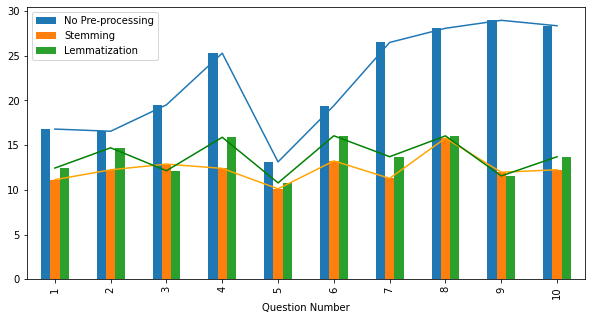

In [48]:
display(mae_per_num.sort_index())
mae_per_num.plot(x='Question Number',kind='bar', figsize=(10,5))
plt.plot(mae_number_stem, color='orange')
plt.plot(mae_number_lm, color='green')
plt.plot(mae_number_ori)
plt.show()

#### Score and Error Value Comparison

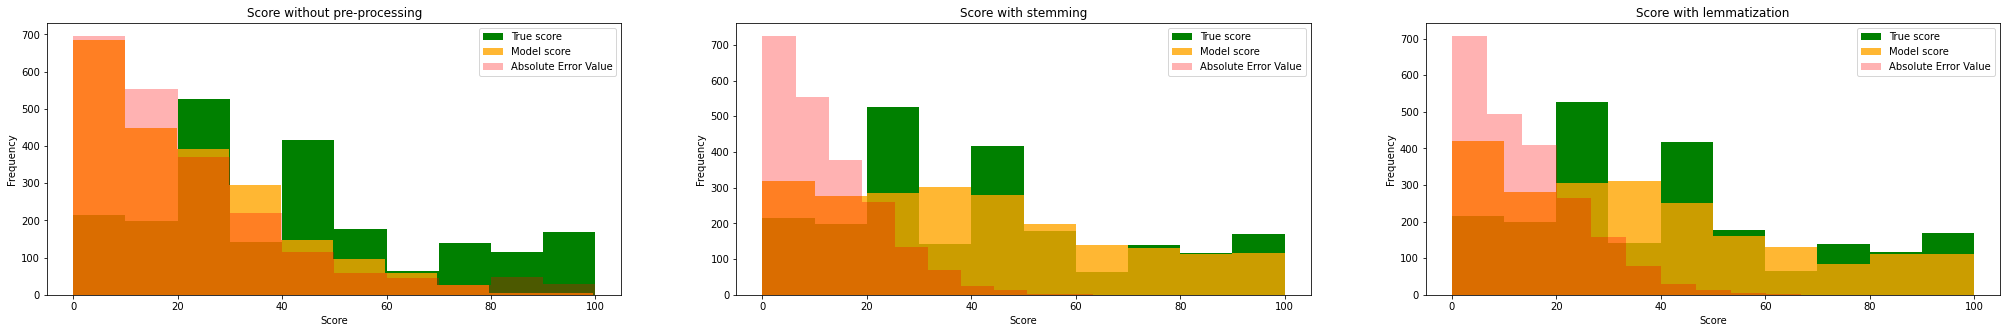

In [49]:
figure, axis = plt.subplots(1, 3, figsize = (35,5))

#Data without pre-processing
axis[0].hist(error_ori['Rata Manual'], label='True score', color='green')
axis[0].hist(error_ori['Model Score'], label='Model score', color='orange', alpha = 0.8)
axis[0].hist(error_ori['Absolute Error Value'], label = "Absolute Error Value", color='red', alpha = 0.3)
axis[0].set_title('Score without pre-processing')
axis[0].set_xlabel('Score')
axis[0].set_ylabel('Frequency')
axis[0].legend()

#Data with stemming
axis[1].hist(error_stem['Rata Manual'], label='True score', color='green')
axis[1].hist(error_stem['Model Score'], label='Model score', color='orange', alpha = 0.8)
axis[1].hist(error_stem['Absolute Error Value'], label = "Absolute Error Value", color='red', alpha = 0.3)
axis[1].set_title('Score with stemming')
axis[1].set_xlabel('Score')
axis[1].set_ylabel('Frequency')
axis[1].legend()

#Data with lemmatization
axis[2].hist(error_lemma['Rata Manual'], label='True score', color='green')
axis[2].hist(error_lemma['Model Score'], label='Model score', color='orange', alpha = 0.8)
axis[2].hist(error_lemma['Absolute Error Value'], label = "Absolute Error Value", color='red', alpha = 0.3)
axis[2].set_title('Score with lemmatization')
axis[2].set_xlabel('Score')
axis[2].set_ylabel('Frequency')
axis[2].legend()

plt.show()


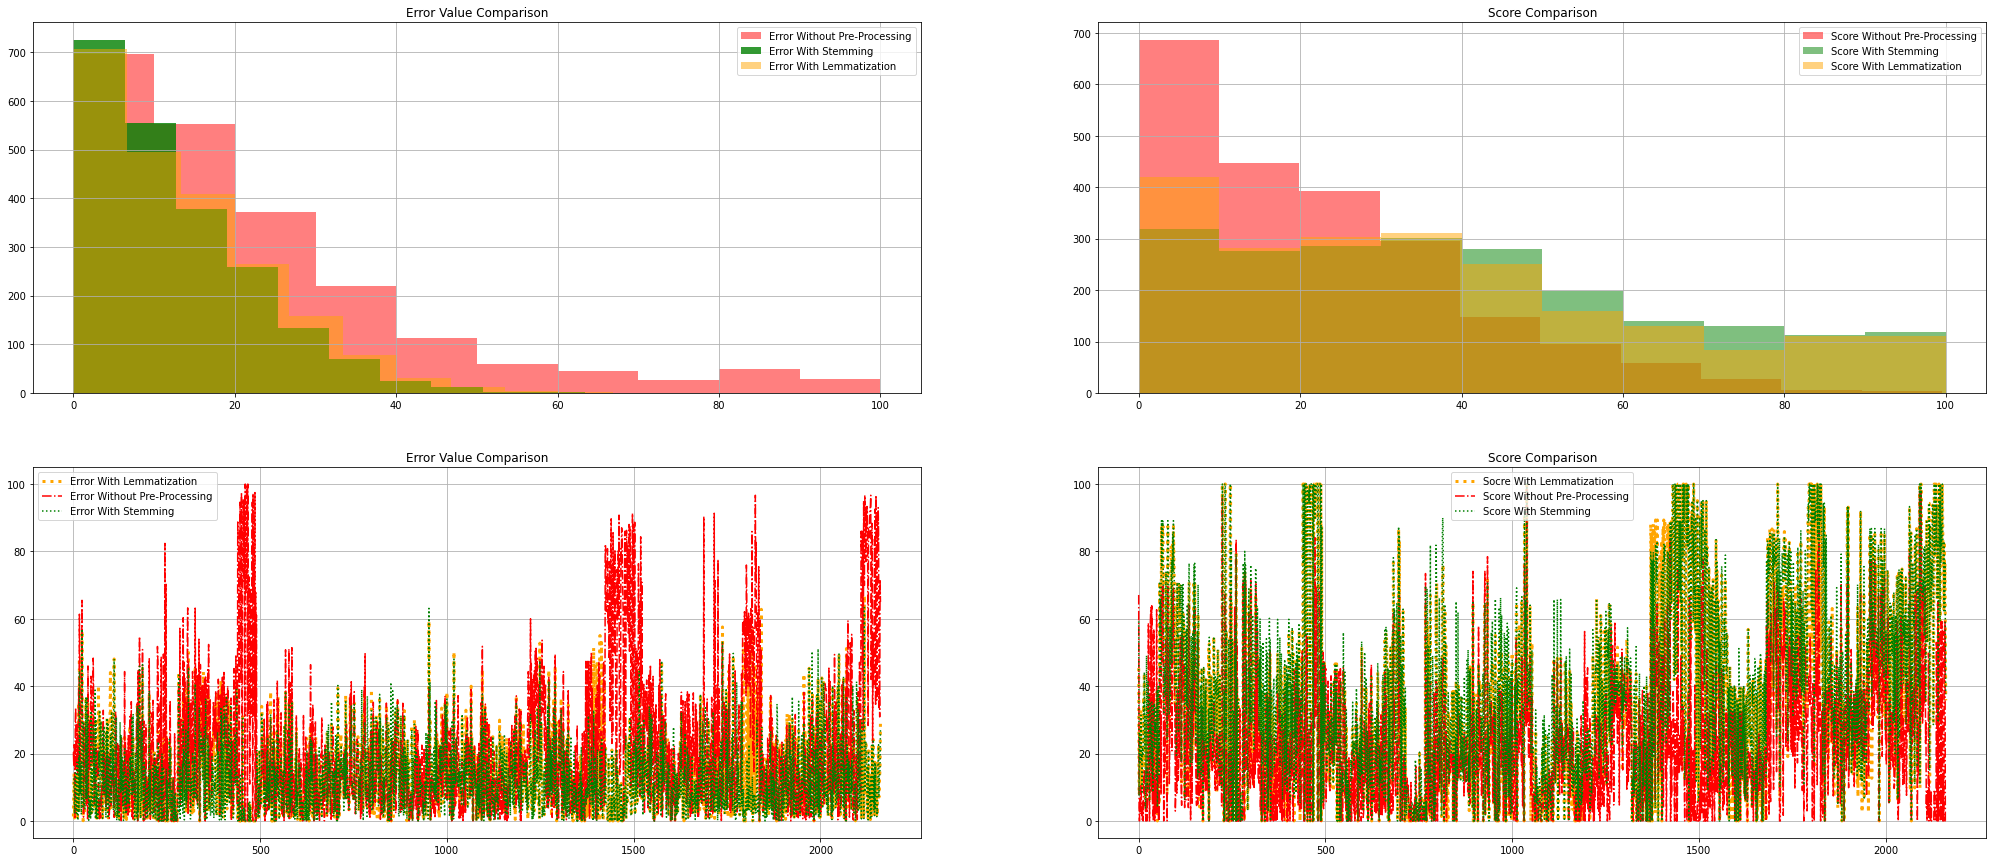

In [50]:
figure, axis = plt.subplots(2, 2, figsize = (35,15))

axis[0,0].hist(error_ori['Absolute Error Value'], label='Error Without Pre-Processing', color='red', alpha = 0.5)
axis[0,0].hist(error_stem['Absolute Error Value'], label='Error With Stemming', color = 'green', alpha = 0.8)
axis[0,0].hist(error_lemma['Absolute Error Value'], label='Error With Lemmatization', linewidth = 3, color='orange', alpha = 0.5)
axis[0,0].set_title('Error Value Comparison')
axis[0,0].legend()
axis[0,0].grid()

axis[1,0].plot(error_lemma['Absolute Error Value'], label='Error With Lemmatization', linewidth = 3, color='orange',  ls = ':')
axis[1,0].plot(error_ori['Absolute Error Value'], label='Error Without Pre-Processing', color='red', ls='-.')
axis[1,0].plot(error_stem['Absolute Error Value'], label='Error With Stemming', color = 'green', ls = 'dotted')
axis[1,0].set_title('Error Value Comparison')
axis[1,0].legend()
axis[1,0].grid()

axis[0,1].hist(error_ori['Model Score'], label='Score Without Pre-Processing', color='red', alpha = 0.5)
axis[0,1].hist(error_stem['Model Score'], label='Score With Stemming', color = 'green', alpha = 0.5)
axis[0,1].hist(error_lemma['Model Score'], label='Score With Lemmatization', linewidth = 3, color='orange', alpha = 0.5)
axis[0,1].set_title('Score Comparison')
axis[0,1].legend()
axis[0,1].grid()

axis[1,1].plot(error_lemma['Model Score'], label='Socre With Lemmatization', linewidth = 3, color='orange',  ls = ':')
axis[1,1].plot(error_ori['Model Score'], label='Score Without Pre-Processing', color='red', ls='-.')
axis[1,1].plot(error_stem['Model Score'], label='Score With Stemming', color = 'green', ls = 'dotted')
axis[1,1].set_title('Score Comparison')
axis[1,1].legend()
axis[1,1].grid()
plt.show()

#### Have the highest error

In [51]:
error_lemma.sort_values(by='Absolute Error Value', inplace=True, ascending=False)
error_lemma.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
2118,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_11,"[brunei, darussalam, negara, memiliki, ibu, ko...",78.333333,50,95,90,0.114403,11.44,75,11,66.89
1842,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_64,"[tuhana, maha, esa, kemanusiaan, adil, adap, p...",85.000000,80,85,90,0.221842,22.18,29,18,62.82
952,8,"[membekali, anak, bimbingan, agama, dini, anak...",siswa_12,"[pemberian, kasih, sayang, perhatian, orang, t...",73.666667,71,75,75,0.142498,14.25,109,64,59.42
1738,3,"[majapahit, kerajaan, berpusat, jawa, timur, I...",siswa_4,"[berpusat, jawa, timur, puncak, kejayaan, peme...",76.666667,85,70,75,0.190915,19.09,10,25,57.58
1818,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_40,"[ketuhanan, maha, esa, kemanusian, adil, berad...",96.666667,90,100,100,0.395083,39.51,26,18,57.16


In [52]:
error_stem.sort_values(by='Absolute Error Value', inplace=True, ascending=False)
error_stem.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
2118,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_11,"[brunei, darussalam, negara, milik, ibukota, k...",78.333333,50,95,90,0.149559,14.96,65,11,63.37
952,8,"[bekal, anak, bimbing, agama, din, anak, kontr...",siswa_12,"[beri, kasih, sayang, perhati, orang, tua, apa...",73.666667,71,75,75,0.105602,10.56,98,53,63.11
23,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_28,"[olahraga, tingkat, kapasitas, otak, gerak, tu...",66.666667,60,65,75,0.097318,9.73,34,18,56.94
1738,3,"[majapahit, raja, pusat, jawa, timur, indonesi...",siswa_4,"[pusat, jawa, timur, puncak, jaya, perintah, h...",76.666667,85,70,75,0.236531,23.65,10,24,53.02
1994,7,"[hukum, perdata, hukum, atur, hubung, individu...",siswa_54,"[hukum, perdata, hukum, hukum, ringan, hukum, ...",8.333333,10,5,10,0.594136,59.41,10,27,51.08


In [53]:
error_ori.sort_values(by='Absolute Error Value', inplace=True, ascending=False)
error_ori.head()

,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
460,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_27,"[tunggal, putra., tunggal, putri., ganda, putr...",100.0,100,100,100,0.000000,0.00,11,14,100.00
467,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_39,"[tunggal, putra,, tunggal, putri,, ganda, putr...",100.0,100,100,100,0.000000,0.00,11,14,100.00
465,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_37,"[tunggal, putra,, tunggal, putri,, ganda, putr...",100.0,100,100,100,0.000000,0.00,11,14,100.00
486,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_59,"[tunggal, putri., tunggal, putra., ganda, putr...",100.0,100,100,100,0.025375,2.54,11,14,97.46
464,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_36,"[tunggal, putra,, tunggal, putri,, ganda, putr...",100.0,100,100,100,0.025375,2.54,11,14,97.46


### Evaluation metrics

In [54]:
eval_ori = round(mae(error_ori['Model Score'], error_ori['Rata Manual']), 2)
eval_stem = round(mae(error_stem['Model Score'], error_stem['Rata Manual']), 2)
eval_lemma = round(mae(error_lemma['Model Score'], error_lemma['Rata Manual']), 2)
print('Mean Absolute Error Value Original= ', eval_ori)
print('Mean Absolute Error Value Stemming= ', eval_stem)
print('Mean Absolute Error Value Lemmatization= ', eval_lemma)

Mean Absolute Error Value Original=  22.2
Mean Absolute Error Value Stemming=  12.32
Mean Absolute Error Value Lemmatization=  13.7


In [55]:
print(mae(error_ori['Model Score'], data['Manual 1 ']))
print(mae(error_stem['Model Score'], data['Manual 1 ']))
print(mae(error_lemma['Model Score'], data['Manual 1 ']))

27.883108233117486
28.668931544865863
29.07337187789084


In [56]:
print(mae(error_ori['Model Score'], data['Manual 2']))
print(mae(error_stem['Model Score'], data['Manual 2']))
print(mae(error_lemma['Model Score'], data['Manual 2']))

31.129592969472714
30.067673450508792
31.189976873265493


In [57]:
print(mae(error_ori['Model Score'], data['Manual 3']))
print(mae(error_stem['Model Score'], data['Manual 3']))
print(mae(error_lemma['Model Score'], data['Manual 3']))

30.62380203515264
29.643963922294173
30.79141073080481


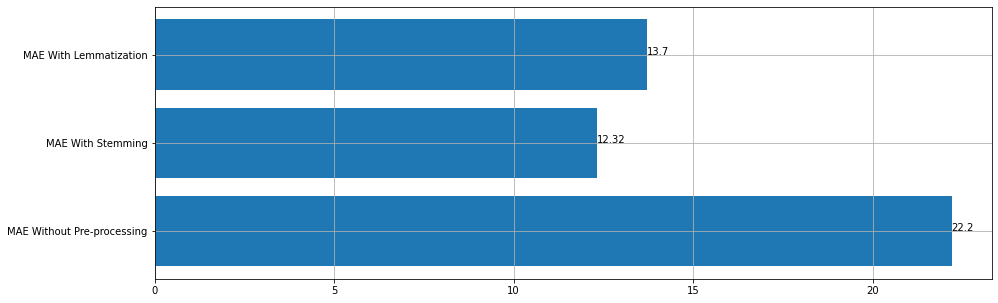

In [58]:
label_mae = ['MAE Without Pre-processing', 'MAE With Stemming', 'MAE With Lemmatization']
value = [eval_ori, eval_stem, eval_lemma]

plt.show()
plt.figure(figsize=(15,5))
plt.grid()
plt.barh(label_mae, value)
 
for index, values in enumerate(value):
    plt.text(values, index,
             str(values))
# plt.bar(label_mae, value)
plt.show()

In [59]:
error_lemma[['Model Score','Rata Manual']].corr().style.background_gradient(cmap="Blues")

,Model Score,Rata Manual
Model Score,1.000000,0.808267
Rata Manual,0.808267,1.000000


In [60]:
error_stem[['Model Score','Rata Manual']].corr().style.background_gradient(cmap="Blues")


,Model Score,Rata Manual
Model Score,1.000000,0.829131
Rata Manual,0.829131,1.000000


In [61]:
error_ori[['Model Score','Rata Manual']].corr().style.background_gradient(cmap="Blues")

,Model Score,Rata Manual
Model Score,1.000000,0.538791
Rata Manual,0.538791,1.000000


#### Final data results

In [62]:
print('Mean Absolute Error Value Stemming Manual Rata-Rata = ', eval_stem)
print('Mean Absolute Error Value Stemming Manual 1= ', mae(error_stem['Model Score'], data['Manual 1 ']))
print('Mean Absolute Error Value Stemming Manual 2= ', mae(error_stem['Model Score'], data['Manual 2']))
print('Mean Absolute Error Value Stemming Manual 3= ', mae(error_stem['Model Score'], data['Manual 3']))
display(error_stem.head())

print('Mean Absolute Error Value Lemmatization Manual Rata-Rata = ', eval_lemma)
print('Mean Absolute Error Value Lemmatization Manual 1= ', mae(error_lemma['Model Score'], data['Manual 1 ']))
print('Mean Absolute Error Value Lemmatization Manual 2= ', mae(error_lemma['Model Score'], data['Manual 2']))
print('Mean Absolute Error Value Lemmatization Manual 3= ', mae(error_lemma['Model Score'], data['Manual 3']))
display(error_lemma.head())

print('Mean Absolute Error Value Without Pre-processing Manual Rata-Rata = ', eval_ori)
print('Mean Absolute Error Value Without Pre-processing Manual 1= ', mae(error_ori['Model Score'], data['Manual 1 ']))
print('Mean Absolute Error Value Without Pre-processing Manual 2= ', mae(error_ori['Model Score'], data['Manual 2']))
print('Mean Absolute Error Value Without Pre-processing Manual 3= ', mae(error_ori['Model Score'], data['Manual 3']))
display(error_ori.head())

Mean Absolute Error Value Stemming Manual Rata-Rata =  12.32
Mean Absolute Error Value Stemming Manual 1=  28.668931544865863
Mean Absolute Error Value Stemming Manual 2=  30.067673450508792
Mean Absolute Error Value Stemming Manual 3=  29.643963922294173


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
2118,10,"[indonesia, thailand, malaysia, singapura, fil...",siswa_11,"[brunei, darussalam, negara, milik, ibukota, k...",78.333333,50,95,90,0.149559,14.96,65,11,63.37
952,8,"[bekal, anak, bimbing, agama, din, anak, kontr...",siswa_12,"[beri, kasih, sayang, perhati, orang, tua, apa...",73.666667,71,75,75,0.105602,10.56,98,53,63.11
23,1,"[kurang, stress, bentuk, otot, tubuh, encang, ...",siswa_28,"[olahraga, tingkat, kapasitas, otak, gerak, tu...",66.666667,60,65,75,0.097318,9.73,34,18,56.94
1738,3,"[majapahit, raja, pusat, jawa, timur, indonesi...",siswa_4,"[pusat, jawa, timur, puncak, jaya, perintah, h...",76.666667,85,70,75,0.236531,23.65,10,24,53.02
1994,7,"[hukum, perdata, hukum, atur, hubung, individu...",siswa_54,"[hukum, perdata, hukum, hukum, ringan, hukum, ...",8.333333,10,5,10,0.594136,59.41,10,27,51.08


Mean Absolute Error Value Lemmatization Manual Rata-Rata =  13.7
Mean Absolute Error Value Lemmatization Manual 1=  29.07337187789084
Mean Absolute Error Value Lemmatization Manual 2=  31.189976873265493
Mean Absolute Error Value Lemmatization Manual 3=  30.79141073080481


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
2118,10,"[Indonesia, Thailand, Malaysia, singapura, Fil...",siswa_11,"[brunei, darussalam, negara, memiliki, ibu, ko...",78.333333,50,95,90,0.114403,11.44,75,11,66.89
1842,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_64,"[tuhana, maha, esa, kemanusiaan, adil, adap, p...",85.000000,80,85,90,0.221842,22.18,29,18,62.82
952,8,"[membekali, anak, bimbingan, agama, dini, anak...",siswa_12,"[pemberian, kasih, sayang, perhatian, orang, t...",73.666667,71,75,75,0.142498,14.25,109,64,59.42
1738,3,"[majapahit, kerajaan, berpusat, jawa, timur, I...",siswa_4,"[berpusat, jawa, timur, puncak, kejayaan, peme...",76.666667,85,70,75,0.190915,19.09,10,25,57.58
1818,4,"[ketuhanan, maha, esa, kemanusiaan, adil, bera...",siswa_40,"[ketuhanan, maha, esa, kemanusian, adil, berad...",96.666667,90,100,100,0.395083,39.51,26,18,57.16


Mean Absolute Error Value Without Pre-processing Manual Rata-Rata =  22.2
Mean Absolute Error Value Without Pre-processing Manual 1=  27.883108233117486
Mean Absolute Error Value Without Pre-processing Manual 2=  31.129592969472714
Mean Absolute Error Value Without Pre-processing Manual 3=  30.62380203515264


,No Soal,Kunci Jawaban,Siswa,Jawaban,Rata Manual,Manual 1,Manual 2,Manual 3,Cosine Similarity,Model Score,Jumlah Kata Jawaban,Jumlah Kata Kunci Jawaban,Absolute Error Value
460,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_27,"[tunggal, putra., tunggal, putri., ganda, putr...",100.0,100,100,100,0.000000,0.00,11,14,100.00
467,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_39,"[tunggal, putra,, tunggal, putri,, ganda, putr...",100.0,100,100,100,0.000000,0.00,11,14,100.00
465,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_37,"[tunggal, putra,, tunggal, putri,, ganda, putr...",100.0,100,100,100,0.000000,0.00,11,14,100.00
486,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_59,"[tunggal, putri., tunggal, putra., ganda, putr...",100.0,100,100,100,0.025375,2.54,11,14,97.46
464,9,"[-Tunggal, putra, -, Tunggal, putri, -, Ganda,...",siswa_36,"[tunggal, putra,, tunggal, putri,, ganda, putr...",100.0,100,100,100,0.025375,2.54,11,14,97.46


In [63]:
error_stem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 2118 to 446
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No Soal                    2162 non-null   int64  
 1   Kunci Jawaban              2162 non-null   object 
 2   Siswa                      2162 non-null   object 
 3   Jawaban                    2162 non-null   object 
 4   Rata Manual                2162 non-null   float64
 5   Manual 1                   2162 non-null   int64  
 6   Manual 2                   2162 non-null   int64  
 7   Manual 3                   2162 non-null   int64  
 8   Cosine Similarity          2162 non-null   float64
 9   Model Score                2162 non-null   float64
 10  Jumlah Kata Jawaban        2162 non-null   int64  
 11  Jumlah Kata Kunci Jawaban  2162 non-null   int64  
 12  Absolute Error Value       2162 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usag

In [64]:
error_lemma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 2118 to 1800
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No Soal                    2162 non-null   int64  
 1   Kunci Jawaban              2162 non-null   object 
 2   Siswa                      2162 non-null   object 
 3   Jawaban                    2162 non-null   object 
 4   Rata Manual                2162 non-null   float64
 5   Manual 1                   2162 non-null   int64  
 6   Manual 2                   2162 non-null   int64  
 7   Manual 3                   2162 non-null   int64  
 8   Cosine Similarity          2162 non-null   float64
 9   Model Score                2162 non-null   float64
 10  Jumlah Kata Jawaban        2162 non-null   int64  
 11  Jumlah Kata Kunci Jawaban  2162 non-null   int64  
 12  Absolute Error Value       2162 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usa

In [65]:
error_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 460 to 240
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No Soal                    2162 non-null   int64  
 1   Kunci Jawaban              2162 non-null   object 
 2   Siswa                      2162 non-null   object 
 3   Jawaban                    2162 non-null   object 
 4   Rata Manual                2162 non-null   float64
 5   Manual 1                   2162 non-null   int64  
 6   Manual 2                   2162 non-null   int64  
 7   Manual 3                   2162 non-null   int64  
 8   Cosine Similarity          2162 non-null   float64
 9   Model Score                2162 non-null   float64
 10  Jumlah Kata Jawaban        2162 non-null   int64  
 11  Jumlah Kata Kunci Jawaban  2162 non-null   int64  
 12  Absolute Error Value       2162 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage